# Lab 01 – Phân tích khám phá dữ liệu (EDA)

## 1.1 Thống kê mô tả (Descriptive Statistics)

### Bài toán 1

#### Nhiệm vụ 1. Khám phá dữ liệu Covid

In [5]:
import pandas as pd
import numpy as np
from scipy import stats

covid_data = pd.read_csv("covid-data.csv", low_memory=False)

# Chuẩn hoá: bỏ khoảng trắng, viết thường
covid_data.columns = covid_data.columns.str.strip()

# Map các tên cột "thực tế" -> tên cột "chuẩn" theo Lab
rename_map = {}
if 'country' in covid_data.columns:
    rename_map['country'] = 'location'
if 'code' in covid_data.columns:
    rename_map['code'] = 'iso_code'

covid_data = covid_data.rename(columns=rename_map)

# Chỉ giữ các cột có sẵn (tránh KeyError nếu file khác cấu trúc)
want = ['iso_code','continent','location','date','total_cases','new_cases']
have = [c for c in want if c in covid_data.columns]
covid_data = covid_data[have]

display(covid_data.head())
print(covid_data.dtypes)
print("Shape:", covid_data.shape)

# (phần thống kê mô tả)
if 'new_cases' in covid_data.columns:
    data_mean = np.mean(covid_data["new_cases"])
    data_median = np.median(covid_data["new_cases"])
    data_mode = stats.mode(covid_data["new_cases"], keepdims=True)
    data_variance = np.var(covid_data["new_cases"])
    data_sd = np.std(covid_data["new_cases"])
    data_max = np.max(covid_data["new_cases"])
    data_min = np.min(covid_data["new_cases"])
    data_percentile = np.percentile(covid_data["new_cases"], 60)
    data_quartile = np.quantile(covid_data["new_cases"], 0.75)
    data_IQR = stats.iqr(covid_data["new_cases"], nan_policy='omit')

    print("Mean:", data_mean)
    print("Median:", data_median)
    print("Mode:", data_mode.mode[0] if hasattr(data_mode, 'mode') else data_mode)
    print("Variance:", data_variance)
    print("Std Dev:", data_sd)
    print("Max:", data_max, "| Min:", data_min)
    print("60th percentile:", data_percentile)
    print("Q3:", data_quartile)
    print("IQR:", data_IQR)
else:
    print("Cột 'new_cases' không có trong file hiện tại. Hãy kiểm tra header hoặc dùng file OWID gốc.")


,iso_code,continent,location,date,total_cases,new_cases
0,AFG,Asia,Afghanistan,2020-01-01,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-02,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-03,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0
4,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0


iso_code        object
continent       object
location        object
date            object
total_cases    float64
new_cases      float64
dtype: object
Shape: (530292, 6)
Mean: 10590.082678546372
Median: nan
Mode: 0.0
Variance: 13834902307.943613
Std Dev: 117621.86152218308
Max: 8401906.0 | Min: 0.0
60th percentile: nan
Q3: nan
IQR: 64.0


#### Nhiệm vụ 2. Khám phá & xử lý dữ liệu Marketing Campaign

In [1]:
import pandas as pd

# Load dataset
marketing_data = pd.read_csv("marketing_campaign.csv")
marketing_data = marketing_data[['ID','Year_Birth', 'Education',
                                 'Marital_Status','Income','Kidhome', 'Teenhome',
                                 'Dt_Customer', 'Recency','NumStorePurchases',
                                 'NumWebVisitsMonth']]

# Xem nhanh & loại trùng
display(marketing_data.head())
marketing_data_duplicate = marketing_data.drop_duplicates()
print("Original shape:", marketing_data.shape, " | After drop_duplicates:", marketing_data_duplicate.shape)

# Ví dụ xóa 1 dòng theo index (minh họa)
_ = marketing_data.drop(labels=[1], axis=0)

# Ví dụ xóa 1 cột (minh họa)
_ = marketing_data.drop(labels=['Year_Birth'], axis=1)

# Thay thế giá trị: ánh xạ Teenhome -> has/no teen (đơn giản hóa phân tích)
marketing_data['Teenhome_replaced'] = marketing_data['Teenhome'].replace([0,1,2],
                                                                         ['has no teen','has teen','has teen'])

# Xử lý thiếu & đổi kiểu dữ liệu
marketing_data['Income'] = marketing_data['Income'].fillna(0)
marketing_data['Income_changed'] = marketing_data['Income'].astype(int)

# Kiểm tra thiếu
display(marketing_data.isnull().sum())

# Tạo phiên bản không còn NA (nếu cần thống kê nghiêm ngặt)
marketing_data_withoutna = marketing_data.dropna(how='any')
print("Shape without NA:", marketing_data_withoutna.shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,4,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,6,5


Original shape: (2240, 11)  | After drop_duplicates: (2240, 11)


ID                   0
Year_Birth           0
Education            0
Marital_Status       0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
Recency              0
NumStorePurchases    0
NumWebVisitsMonth    0
Teenhome_replaced    0
Income_changed       0
dtype: int64

Shape without NA: (2240, 13)


#### Bài tập thực hành 1
Thực hiện thống kê mô tả trên tập dữ liệu về phân loại chất lượng rượu đỏ. 
Dữ liệu lấy tại https://www.kaggle.com/code/eisgandar/red-wine-quality-eda-classification


In [1]:
# --- Paths ---
WINE_PATH = "winequality-red.csv"  

import pandas as pd
import numpy as np
from scipy import stats

# 1) Nạp dữ liệu 
wine = pd.read_csv(WINE_PATH, sep=",")
# Chuẩn hoá tên cột (an toàn)
wine.columns = wine.columns.str.strip().str.replace(r"\s+", "_", regex=True).str.lower()

# 2) Kiểm tra nhanh
display(wine.head())
display(wine.info())
print("Missing values per column:\n", wine.isna().sum())

# 3) Thống kê mô tả cơ bản
desc = wine.describe().T
desc["variance"] = wine.var(numeric_only=True)
desc["iqr"] = wine.quantile(0.75, numeric_only=True) - wine.quantile(0.25, numeric_only=True)
display(desc)

# 4) Ví dụ tính riêng trên 1 biến mục tiêu "quality"
q = wine["quality"]
print(
    "quality -> mean:", q.mean(),
    "| median:", q.median(),
    "| mode:", q.mode().iloc[0],
    "| std:", q.std(),
    "| var:", q.var(),
    "| min:", q.min(),
    "| max:", q.max(),
)
print("60th percentile:", np.percentile(q, 60))
print("IQR:", stats.iqr(q, nan_policy="omit"))


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

Missing values per column:
 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


,count,mean,std,min,25%,50%,75%,max,variance,iqr
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000,3.031416,2.100000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000,0.032062,0.250000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000,0.037947,0.330000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000,1.987897,0.700000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100,0.002215,0.020000
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000,109.414884,14.000000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000,1082.102373,40.000000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369,0.000004,0.002235
ph,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000,0.023835,0.190000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000,0.028733,0.180000


quality -> mean: 5.6360225140712945 | median: 6.0 | mode: 5 | std: 0.807569439734705 | var: 0.6521683999934252 | min: 3 | max: 8
60th percentile: 6.0
IQR: 1.0


#### Bài tập thực hành 2
Thực hiện thống kê mô tả trên tập dữ liệu về bệnh tiểu đường. Dữ liệu lấy tại
https://www.kaggle.com/code/vincentlugat/pima-indians-diabetes-eda-prediction-0-906


In [2]:
import pandas as pd
import numpy as np
from scipy import stats

# Nạp dữ liệu
diabetes = pd.read_csv("diabetes.csv")
diabetes = diabetes [['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]


# Thông tin cơ bản
print("\n1. THÔNG TIN CƠ BẢN")
print(f"Kích thước dữ liệu: {diabetes.shape[0]} dòng x {diabetes.shape[1]} cột")
print(f"\nKiểu dữ liệu:")
print(diabetes.dtypes)

# Kiểm tra giá trị null
print("\n2. KIỂM TRA GIÁ TRỊ NULL")
print(f"Tổng số giá trị null: {diabetes.isnull().sum().sum()}")
print(diabetes.isnull().sum())

# Kiểm tra giá trị 0 (bất thường)
print("\n3. KIỂM TRA GIÁ TRỊ 0 (KHÔNG HỢP LÝ)")
print("Một số cột không thể có giá trị 0 về mặt sinh học:\n")
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_cols:
    zero_count = (diabetes[col] == 0).sum()
    zero_pct = (zero_count / len(diabetes)) * 100
    print(f"{col:20s}: {zero_count:3d} giá trị 0 ({zero_pct:5.2f}%)")

print("Thay thế bằng giá trị trung vị (median)\n")
for col in zero_cols:
    zero_count_before = (diabetes[col] == 0).sum()
    	# Thay thế 0 bằng NaN
    diabetes[col] = diabetes[col].replace(0, np.nan)
    	# Điền bằng median
    median_value = diabetes[col].median()
    diabetes[col] = diabetes[col].fillna(median_value)
    
    print(f"{col:20s}: Đã thay {zero_count_before:3d} giá trị 0 bằng median = {median_value:.2f}")
    
# Kiểm tra giá trị trùng lặp
print("\n4. XỬ LÝ DỮ LIỆU TRÙNG LẶP")
duplicates = diabetes.duplicated().sum()
if duplicates > 0:
    diabetes = diabetes.drop_duplicates()
    print(f"Đã loại bỏ {duplicates} dòng trùng lặp")
else:
    print("Không có dữ liệu trùng lặp")

# Phát hiện outliers
print("\n5. PHÁT HIỆN OUTLIERS (theo phương pháp IQR)")
for col in diabetes.columns[:-1]:
    Q1 = diabetes[col].quantile(0.25)
    Q3 = diabetes[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = diabetes[(diabetes[col] < lower) | (diabetes[col] > upper)]
    print(f"{col:25s}: {len(outliers):3d} outliers ({len(outliers)/len(diabetes)*100:5.2f}%)")

# Kiểm tra lại sau khi xử lý
print("\n6. KIỂM TRA LẠI SAU XỬ LÝ")
print(f"Kích thước dữ liệu sau xử lý: {diabetes.shape[0]} dòng x {diabetes.shape[1]} cột")
print(f"Tổng số giá trị null: {diabetes.isnull().sum().sum()}")

print("\nSố giá trị 0 còn lại trong các cột quan trọng:")
for col in zero_cols:
    zero_count = (diabetes[col] == 0).sum()
    print(f"{col:20s}: {zero_count} giá trị 0")

print("\n" + "=" * 80)

# Thống kê mô tả
print("\nTHỐNG KÊ MÔ TẢ")
display(diabetes.describe().T)

# Phân tích biến kết quả
print("\nPHÂN TÍCH KẾT QUẢ")
print(diabetes['Outcome'].value_counts())
print(f"\nTỷ lệ bệnh tiểu đường: {diabetes['Outcome'].mean()*100:.2f}%")

# So sánh giữa 2 nhóm
print("\nSO SÁNH TRUNG BÌNH GIỮA 2 NHÓM")
comparison = diabetes.groupby('Outcome').mean()
comparison.index = ['Không bệnh', 'Có bệnh']
display(comparison.round(2))


1. THÔNG TIN CƠ BẢN
Kích thước dữ liệu: 768 dòng x 9 cột

Kiểu dữ liệu:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

2. KIỂM TRA GIÁ TRỊ NULL
Tổng số giá trị null: 0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

3. KIỂM TRA GIÁ TRỊ 0 (KHÔNG HỢP LÝ)
Một số cột không thể có giá trị 0 về mặt sinh học:

Glucose             :   5 giá trị 0 ( 0.65%)
BloodPressure       :  35 giá trị 0 ( 4.56%)
SkinThickness       : 227 giá trị 0 (29.56%)
Insulin             : 374 giá t

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00



PHÂN TÍCH KẾT QUẢ
Outcome
0    500
1    268
Name: count, dtype: int64

Tỷ lệ bệnh tiểu đường: 34.90%

SO SÁNH TRUNG BÌNH GIỮA 2 NHÓM


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Không bệnh,3.30,110.68,70.92,27.73,127.79,30.89,0.43,31.19
Có bệnh,4.87,142.13,75.12,31.69,164.70,35.38,0.55,37.07


## 1.2 Xử lý và trực quan hóa dữ liệu

### Bài toán 1

####  Nhiệm vụ 1. Trực quan hóa dữ liệu với Matplotlib – Housing Prices

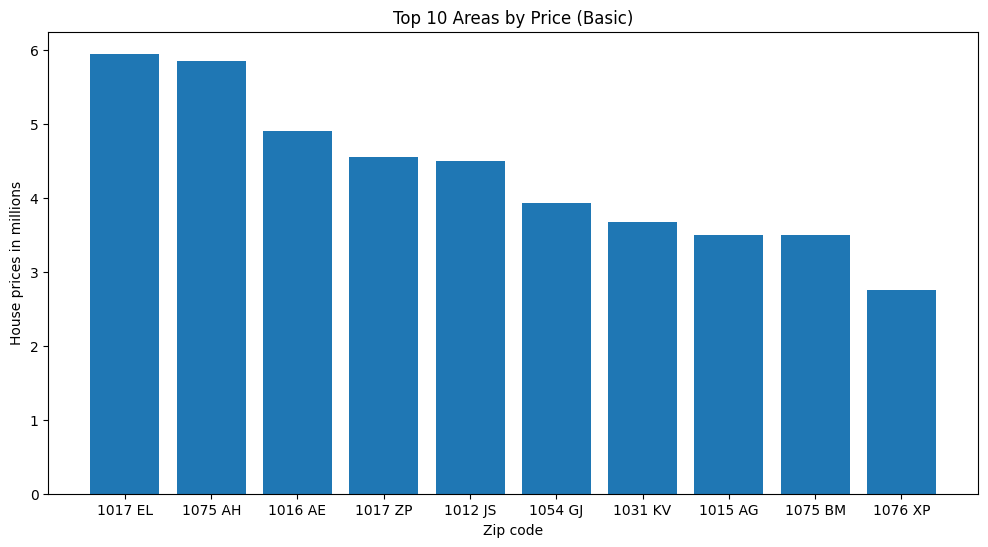

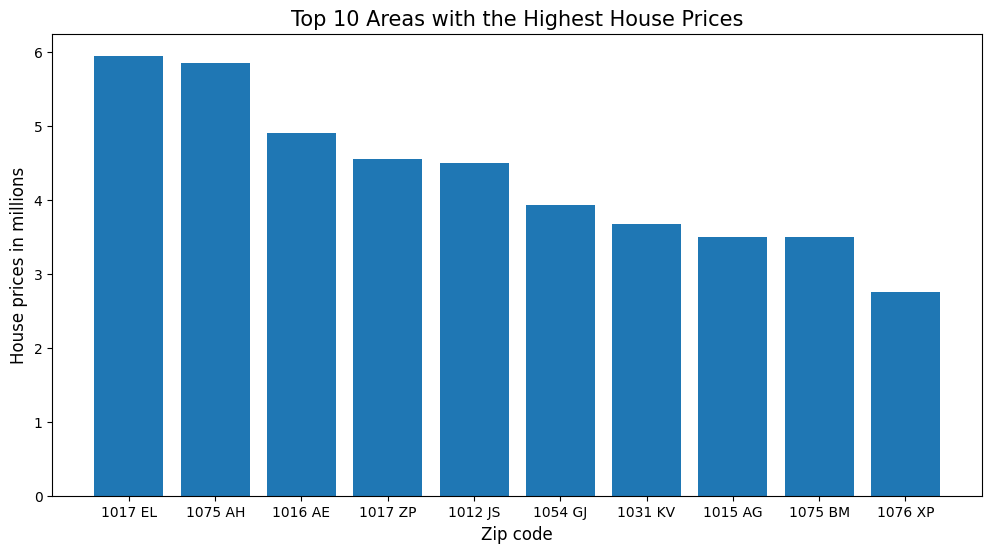

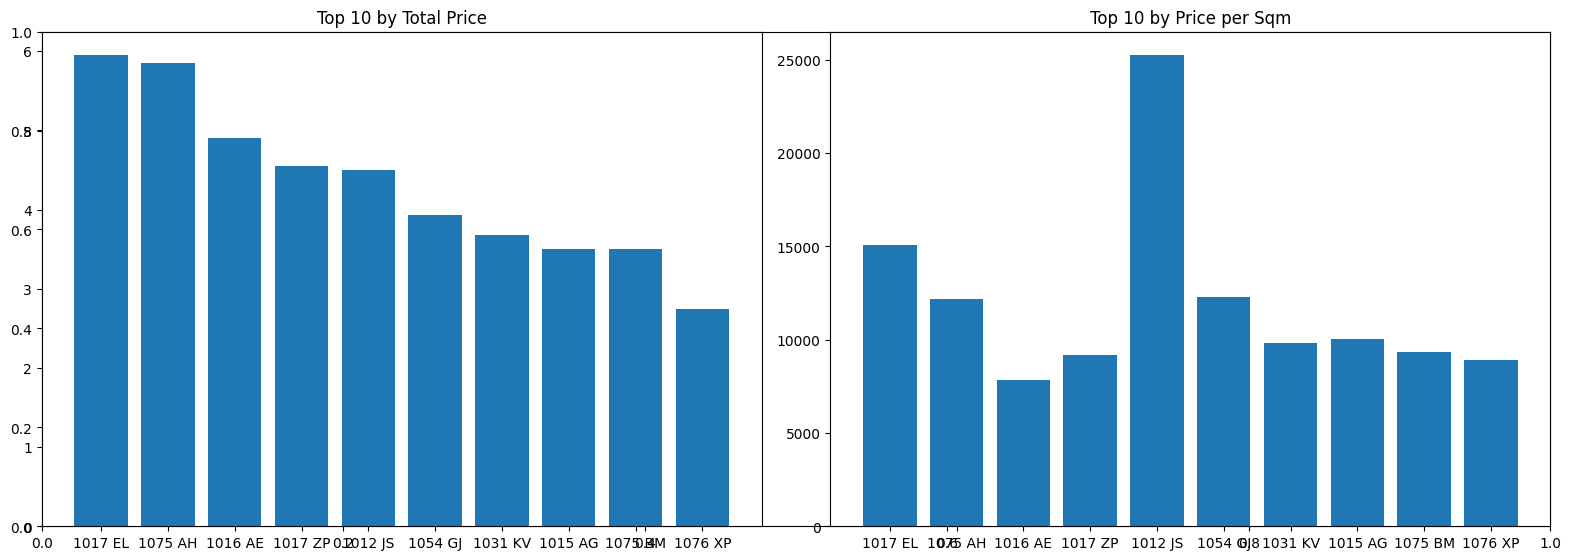

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

houseprices_data = pd.read_csv("HousingPricesData.csv")
houseprices_data = houseprices_data[['Zip', 'Price', 'Area', 'Room']]
houseprices_data['PriceperSqm'] = houseprices_data['Price'] / houseprices_data['Area']

houseprices_sorted = houseprices_data.sort_values('Price', ascending=False)
# Case 1: Basic bar
plt.figure(figsize=(12,6))
x = houseprices_sorted['Zip'][0:10]
y = houseprices_sorted['Price'][0:10]/1e6
plt.bar(x, y)
plt.title('Top 10 Areas by Price (Basic)')
plt.xlabel('Zip code')
plt.ylabel('House prices in millions')
plt.show()

# Case 2: Advanced with titles/labels
plt.figure(figsize=(12,6))
plt.bar(x, y)
plt.title('Top 10 Areas with the Highest House Prices', fontsize=15)
plt.xlabel('Zip code', fontsize=12)
plt.ylabel('House prices in millions', fontsize=12)
plt.show()

# Case 3: Two perspectives (Price vs Price per Sqm)
fig, ax = plt.subplots(figsize=(16,6))
y1 = houseprices_sorted['PriceperSqm'][0:10]

plt.subplot(1,2,1)
plt.bar(x, y)
plt.title('Top 10 by Total Price')

plt.subplot(1,2,2)
plt.bar(x, y1)
plt.title('Top 10 by Price per Sqm')

plt.tight_layout()
plt.show()


#### Nhiệm vụ 2. Trực quan hóa dữ liệu với Seaborn – Housing Prices

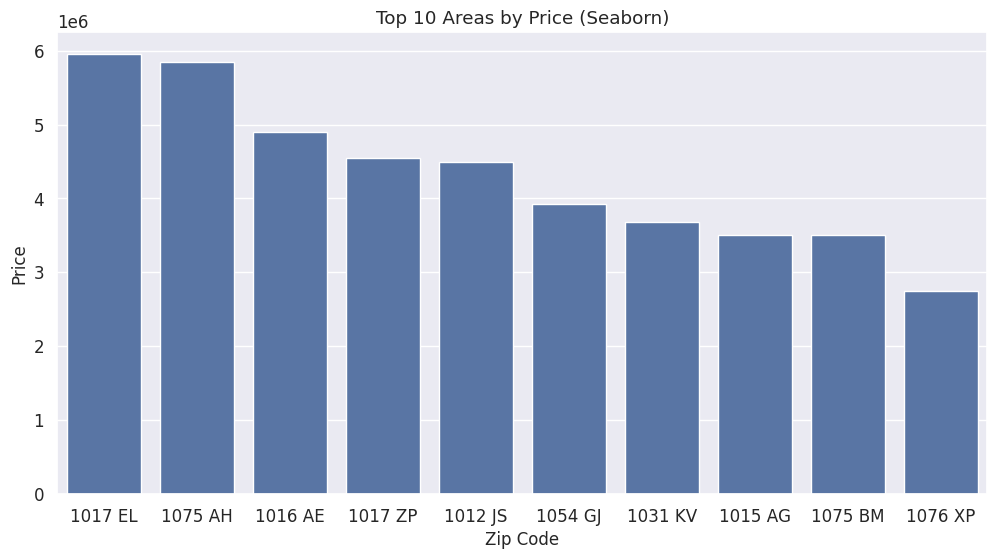

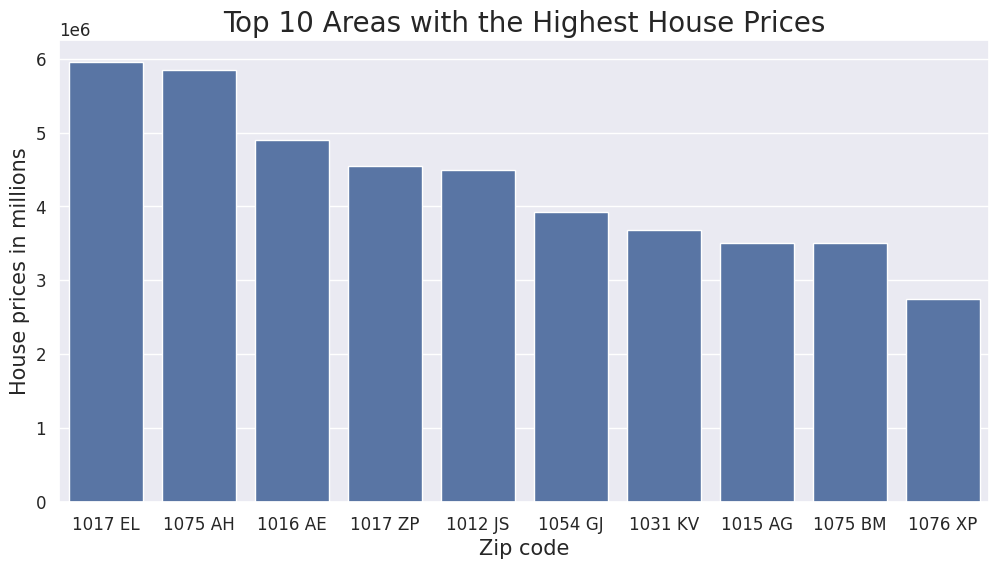

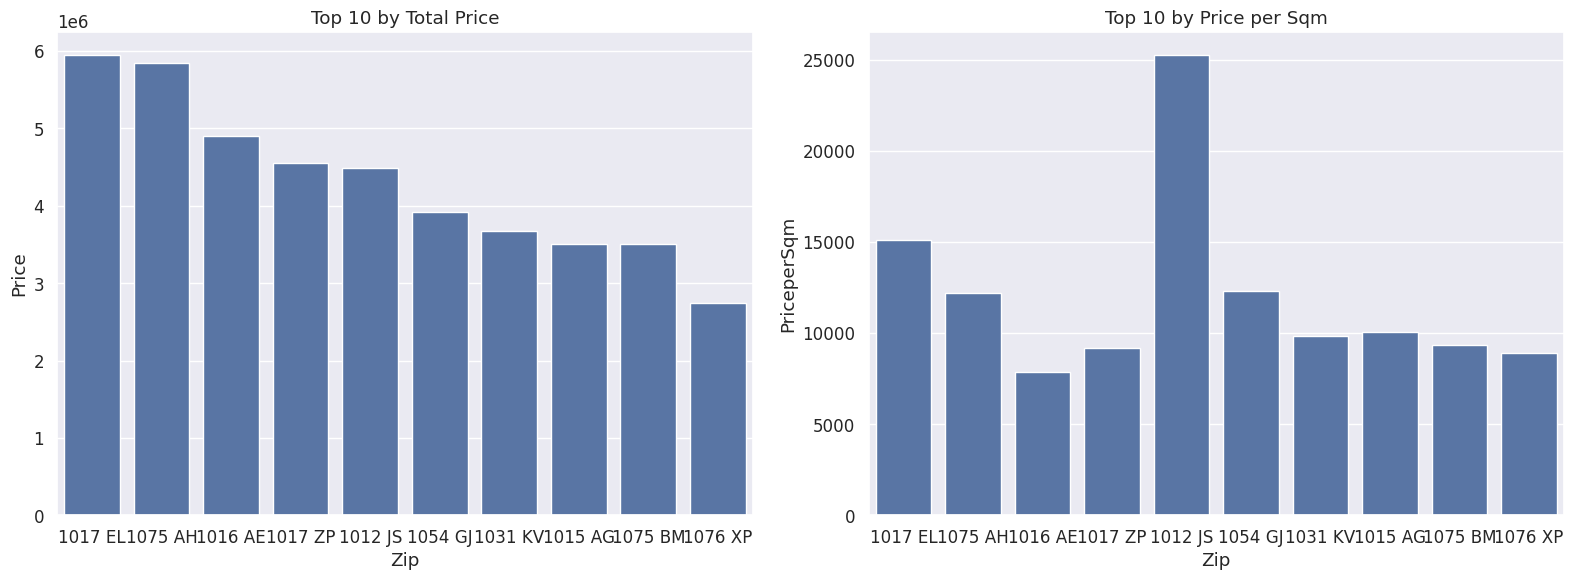

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

houseprices_data = pd.read_csv("HousingPricesData.csv")
houseprices_data = houseprices_data[['Zip', 'Price', 'Area', 'Room']]
houseprices_data['PriceperSqm'] = houseprices_data['Price'] / houseprices_data['Area']
houseprices_sorted = houseprices_data.sort_values('Price', ascending=False)

data_top10 = houseprices_sorted[0:10]

# Case 1: Basic seaborn barplot
plt.figure(figsize=(12,6))
sns.barplot(data=data_top10, x='Zip', y='Price')
plt.title('Top 10 Areas by Price (Seaborn)')
plt.xlabel('Zip Code', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

# Case 2: Advanced labels
plt.figure(figsize=(12,6))
ax = sns.barplot(data=data_top10, x='Zip', y='Price')
ax.set_xlabel('Zip code', fontsize=15)
ax.set_ylabel('House prices in millions', fontsize=15)
ax.set_title('Top 10 Areas with the Highest House Prices', fontsize=20)
plt.show()

# Case 3: View multiple perspectives
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.set(font_scale=1.1)
ax1 = sns.barplot(data=data_top10, x='Zip', y='Price', ax=ax[0])
ax1.set_title('Top 10 by Total Price')
ax2 = sns.barplot(data=data_top10, x='Zip', y='PriceperSqm', ax=ax[1])
ax2.set_title('Top 10 by Price per Sqm')
plt.tight_layout()
plt.show()

#### Bài tập thực hành 1
Thực hiện trực quan hóa dữ liệu trên tập dữ liệu về phân loại chất lượng rượu đỏ. Dữ liệu lấy tại
https://www.kaggle.com/code/eisgandar/red-wine-quality-eda-classification

/tmp/ipykernel_603/1596089675.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=wine_data, x='quality', palette='Reds_d')


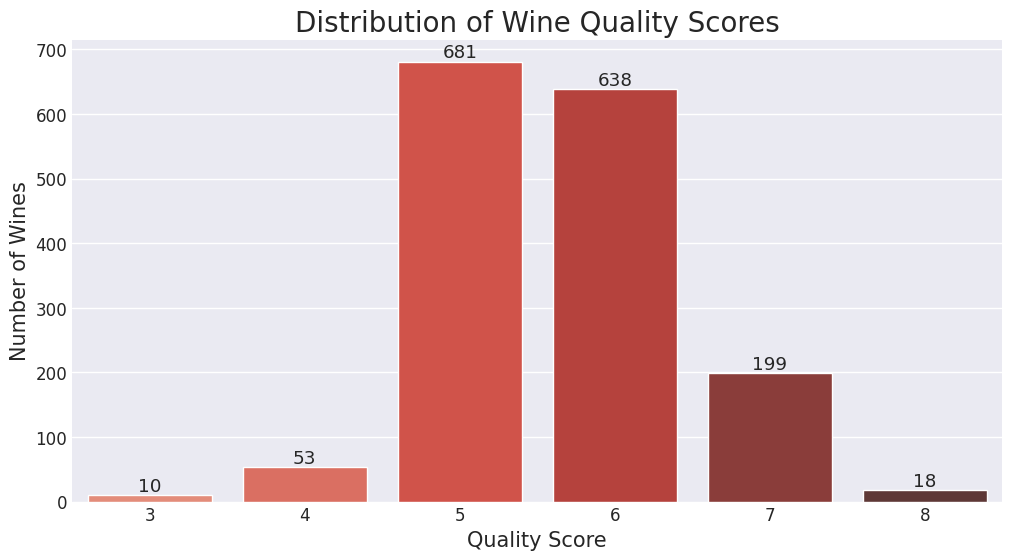

/tmp/ipykernel_603/1596089675.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.boxplot(data=wine_data, x='quality', y='alcohol', ax=ax[0, 0], palette='Reds')
/tmp/ipykernel_603/1596089675.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.boxplot(data=wine_data, x='quality', y='volatile acidity', ax=ax[0, 1], palette='Reds')
/tmp/ipykernel_603/1596089675.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.boxplot(data=wine_data, x='quality', y='sulphates', ax=ax[1, 0], palette='Reds')
/tmp/ipykernel_603/1596089675.py:49: FutureWarning: 

Pa

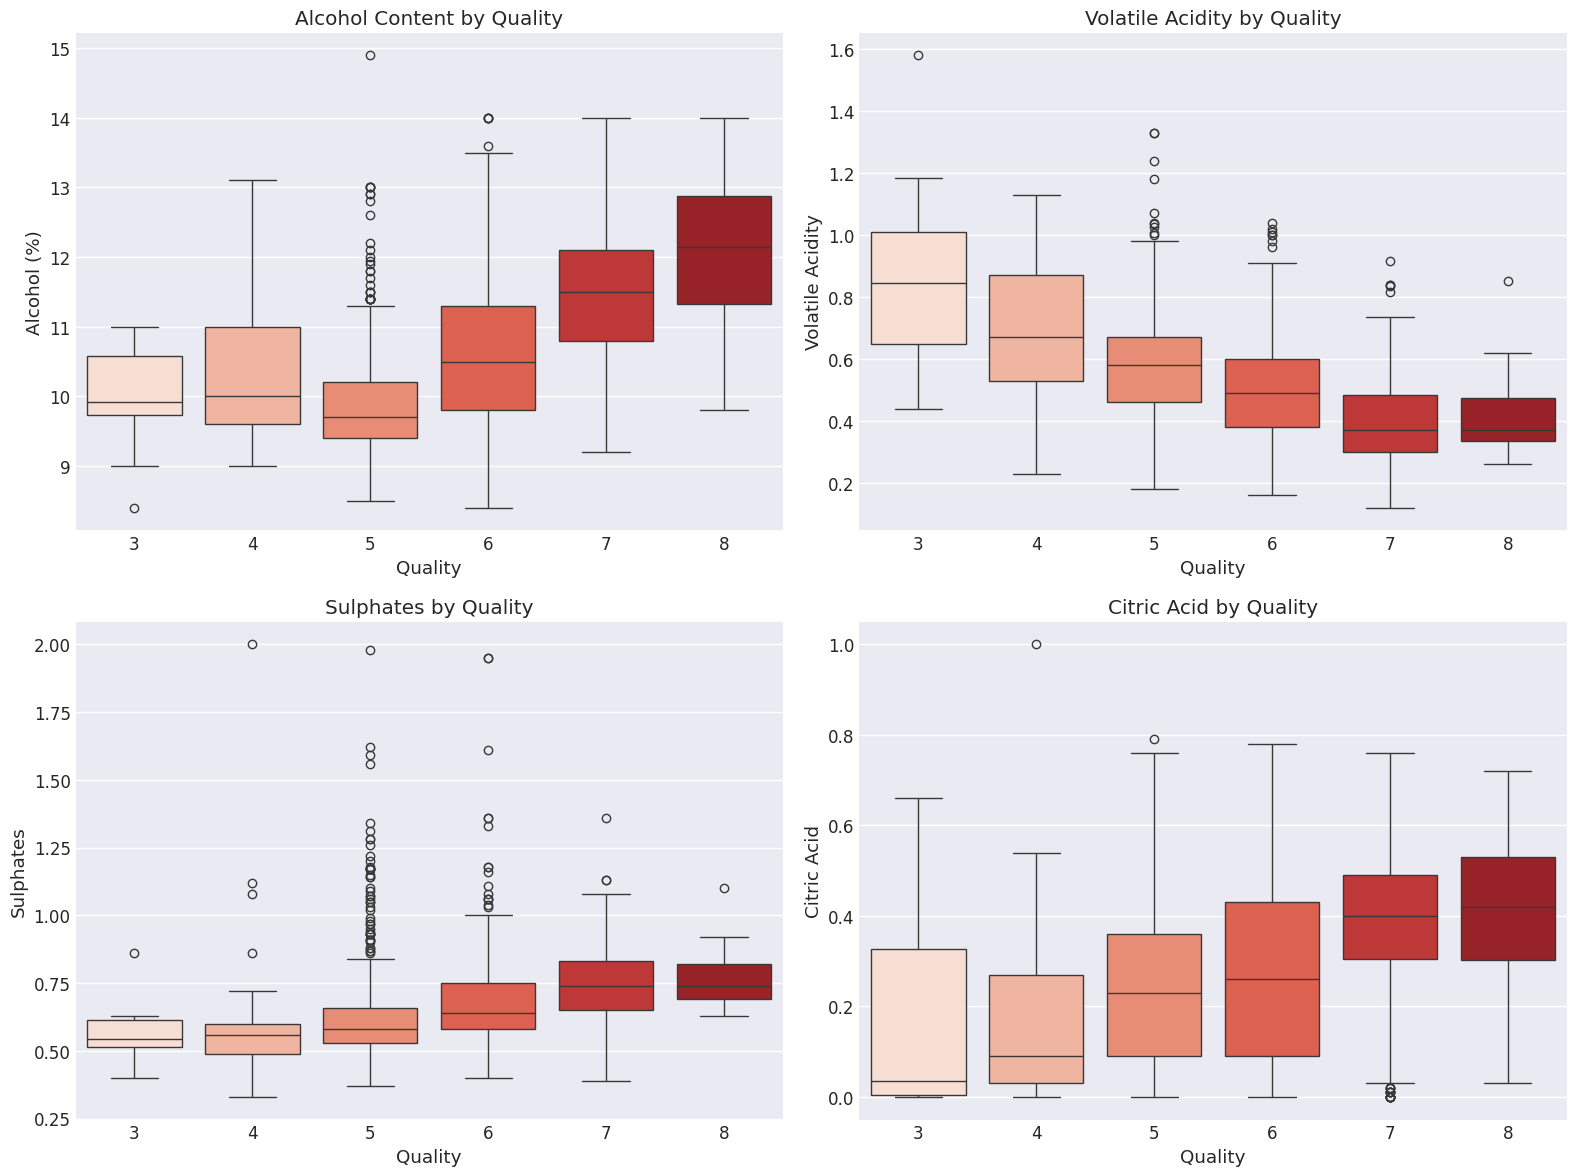

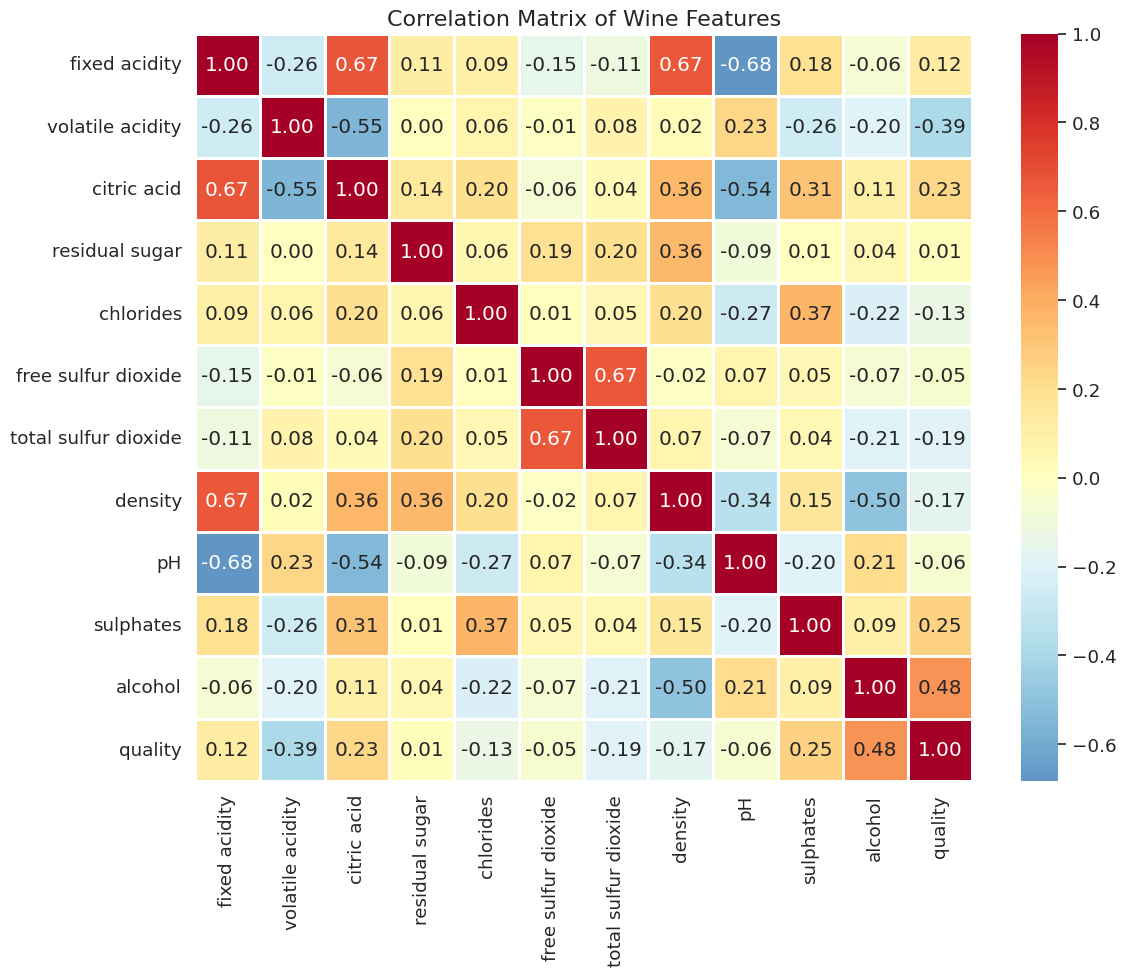

/tmp/ipykernel_603/1596089675.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=quality_corr.values, y=quality_corr.index, palette='RdYlGn')


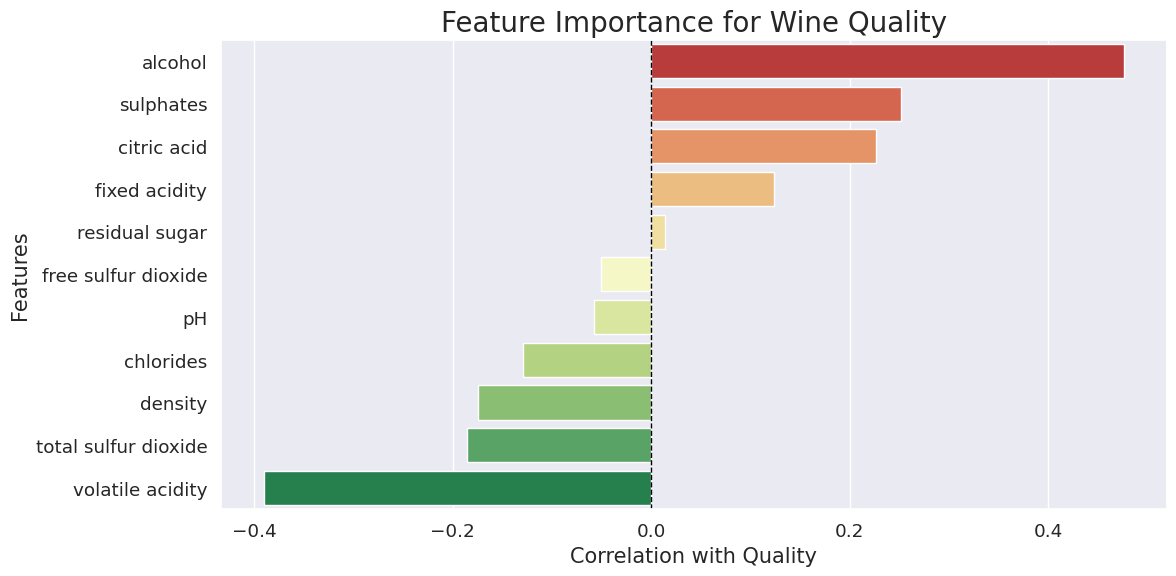

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Thiết lập style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

wine_data = pd.read_csv("winequality-red.csv")

# Phân phối chất lượng rượu
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=wine_data, x='quality', palette='Reds_d')
ax.set_xlabel('Quality Score', fontsize=15)
ax.set_ylabel('Number of Wines', fontsize=15)
ax.set_title('Distribution of Wine Quality Scores', fontsize=20)

# Thêm giá trị trên mỗi cột
for container in ax.containers:
    ax.bar_label(container)

plt.show()

# So sánh nhiều thuộc tính cùng lúc
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
sns.set(font_scale=1.2)

# Biểu đồ 1: Alcohol vs Quality
ax1 = sns.boxplot(data=wine_data, x='quality', y='alcohol', ax=ax[0, 0], palette='Reds')
ax1.set_xlabel('Quality')
ax1.set_ylabel('Alcohol (%)')
ax1.set_title('Alcohol Content by Quality')

# Biểu đồ 2: Volatile Acidity vs Quality
ax2 = sns.boxplot(data=wine_data, x='quality', y='volatile acidity', ax=ax[0, 1], palette='Reds')
ax2.set_xlabel('Quality')
ax2.set_ylabel('Volatile Acidity')
ax2.set_title('Volatile Acidity by Quality')

# Biểu đồ 3: Sulphates vs Quality
ax3 = sns.boxplot(data=wine_data, x='quality', y='sulphates', ax=ax[1, 0], palette='Reds')
ax3.set_xlabel('Quality')
ax3.set_ylabel('Sulphates')
ax3.set_title('Sulphates by Quality')

# Biểu đồ 4: Citric Acid vs Quality
ax4 = sns.boxplot(data=wine_data, x='quality', y='citric acid', ax=ax[1, 1], palette='Reds')
ax4.set_xlabel('Quality')
ax4.set_ylabel('Citric Acid')
ax4.set_title('Citric Acid by Quality')

plt.tight_layout()
plt.show()

# Ma trận tương quan
plt.figure(figsize=(12, 10))
correlation = wine_data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='RdYlBu_r', center=0, linewidths=1)
plt.title('Correlation Matrix of Wine Features', fontsize=16)
plt.tight_layout()
plt.show()

# Các thuộc tính ảnh hưởng nhất đến chất lượng
plt.figure(figsize=(12, 6))
quality_corr = wine_data.corr()['quality'].sort_values(ascending=False)[1:]
ax = sns.barplot(x=quality_corr.values, y=quality_corr.index, palette='RdYlGn')
ax.set_xlabel('Correlation with Quality', fontsize=15)
ax.set_ylabel('Features', fontsize=15)
ax.set_title('Feature Importance for Wine Quality', fontsize=20)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

#### Bài tập thực hành 2
+ Thực hiện trực quan hóa dữ liệu trên tập dữ liệu về bệnh tiểu đường. Dữ liệu lấy tại 
https://www.kaggle.com/code/vincentlugat/pima-indians-diabetes-eda-prediction-0-906


/tmp/ipykernel_621/3559959701.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=diabetes_data, x='Outcome', palette='Set2')
/tmp/ipykernel_621/3559959701.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Diabetes', 'Diabetes'])


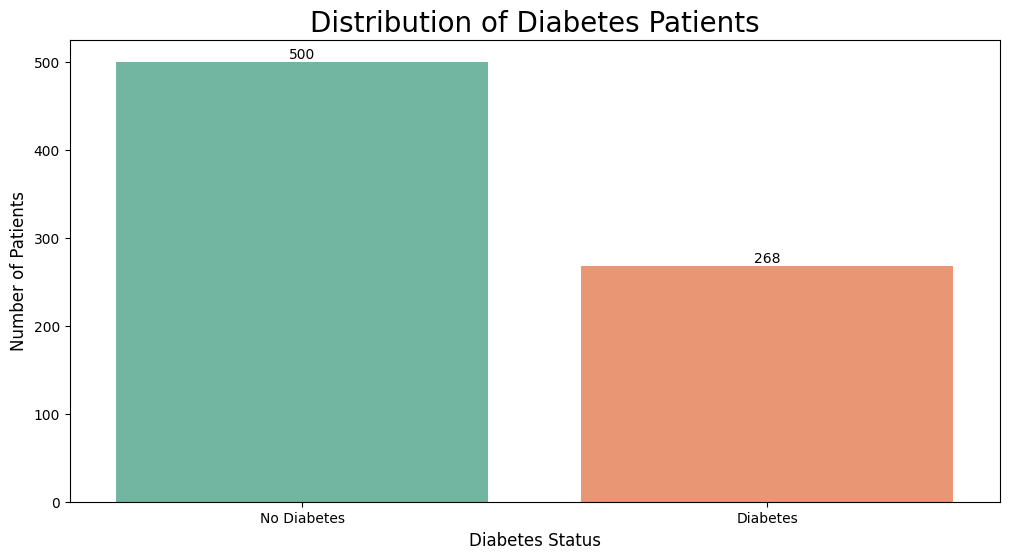

/tmp/ipykernel_621/3559959701.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.boxplot(data=diabetes_data, x='Outcome', y='Glucose', ax=ax[0, 0], palette='Set2')
/tmp/ipykernel_621/3559959701.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['No Diabetes', 'Diabetes'])
/tmp/ipykernel_621/3559959701.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.boxplot(data=diabetes_data, x='Outcome', y='BMI', ax=ax[0, 1], palette='Set2')
/tmp/ipykernel_621/3559959701.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLo

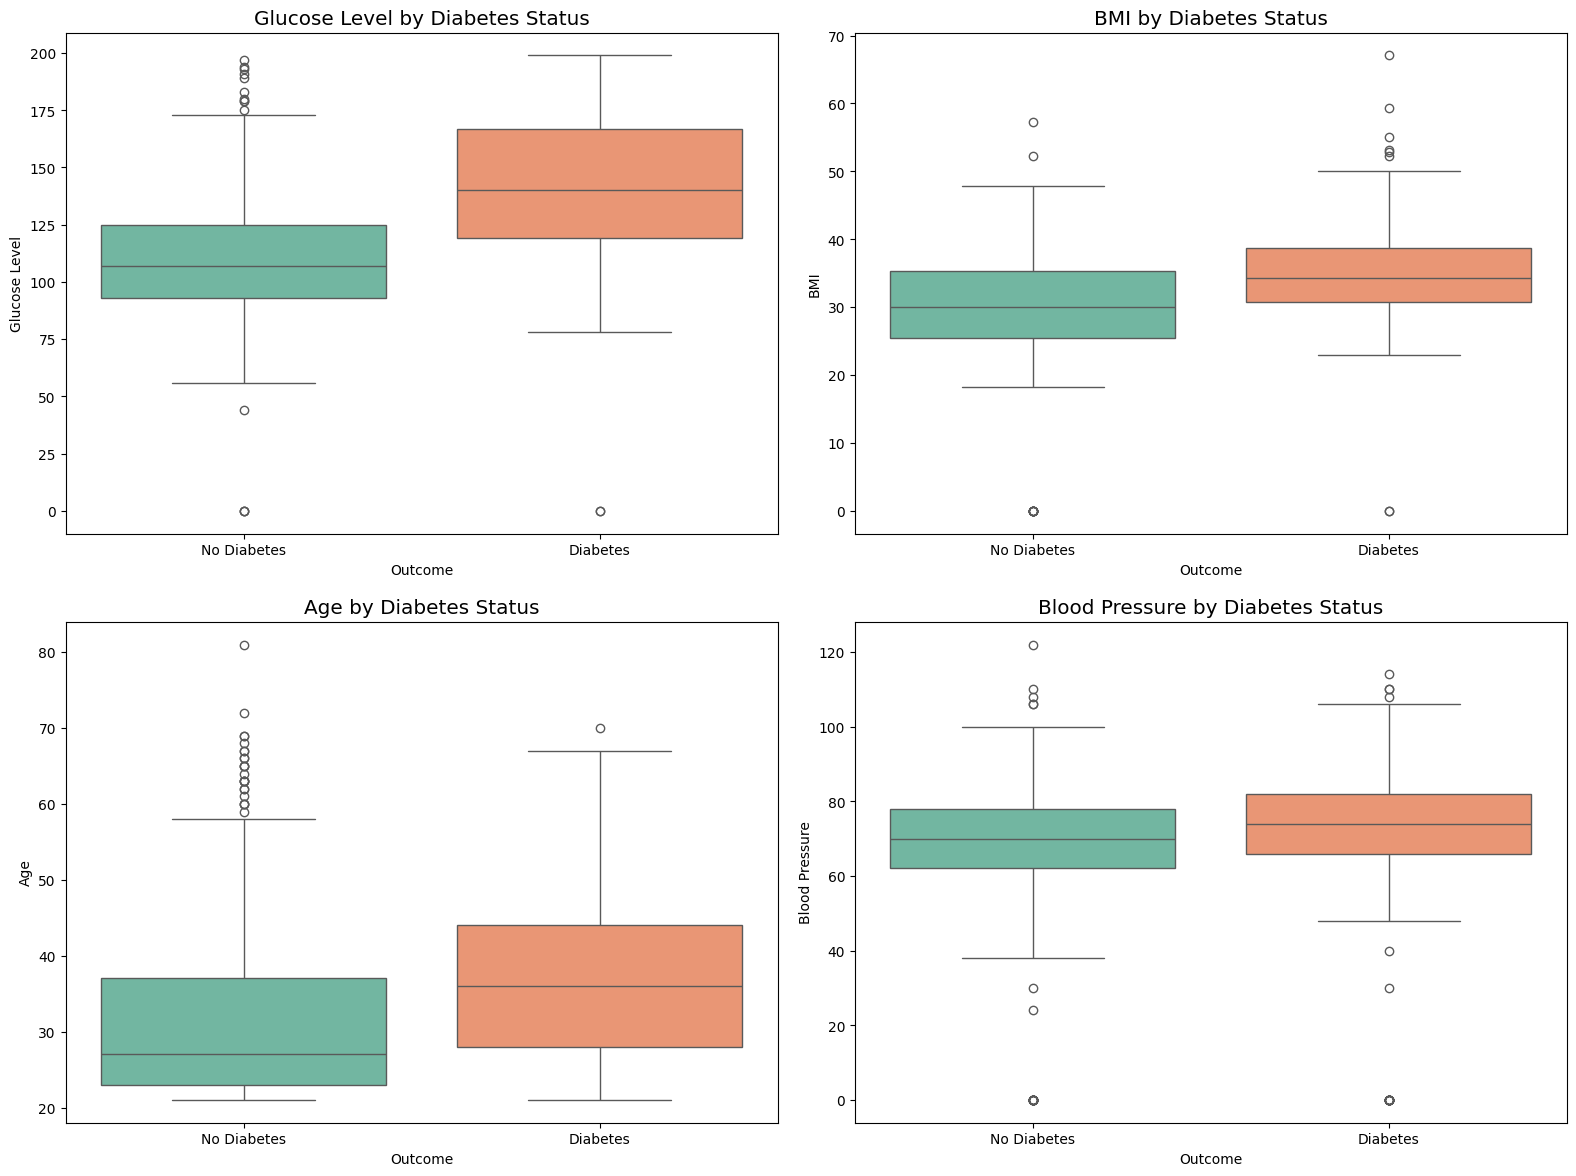

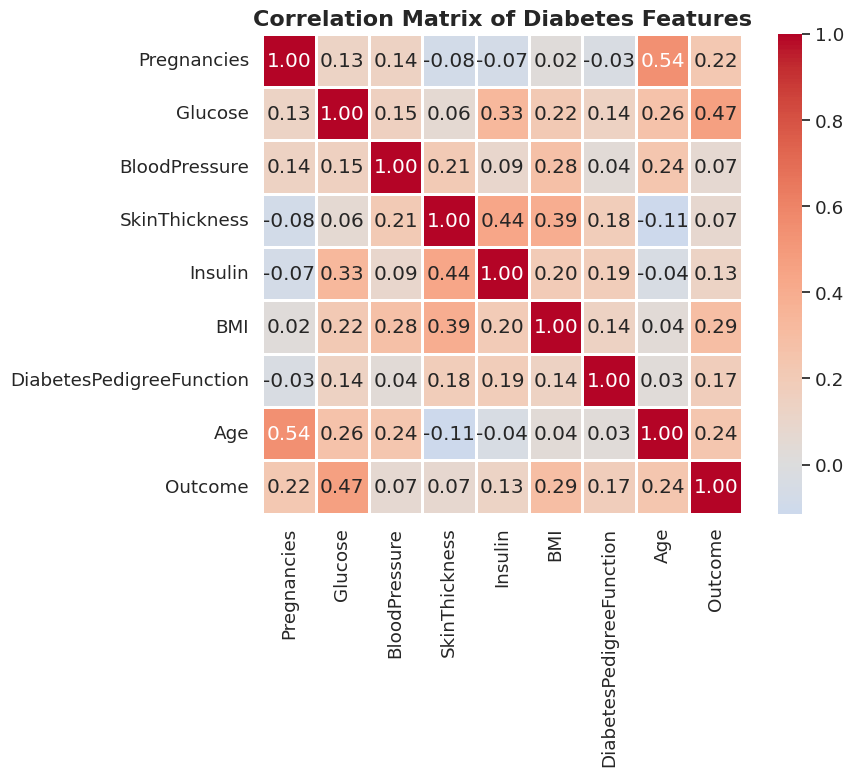

/tmp/ipykernel_621/3559959701.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=outcome_corr.values, y=outcome_corr.index, palette=colors)


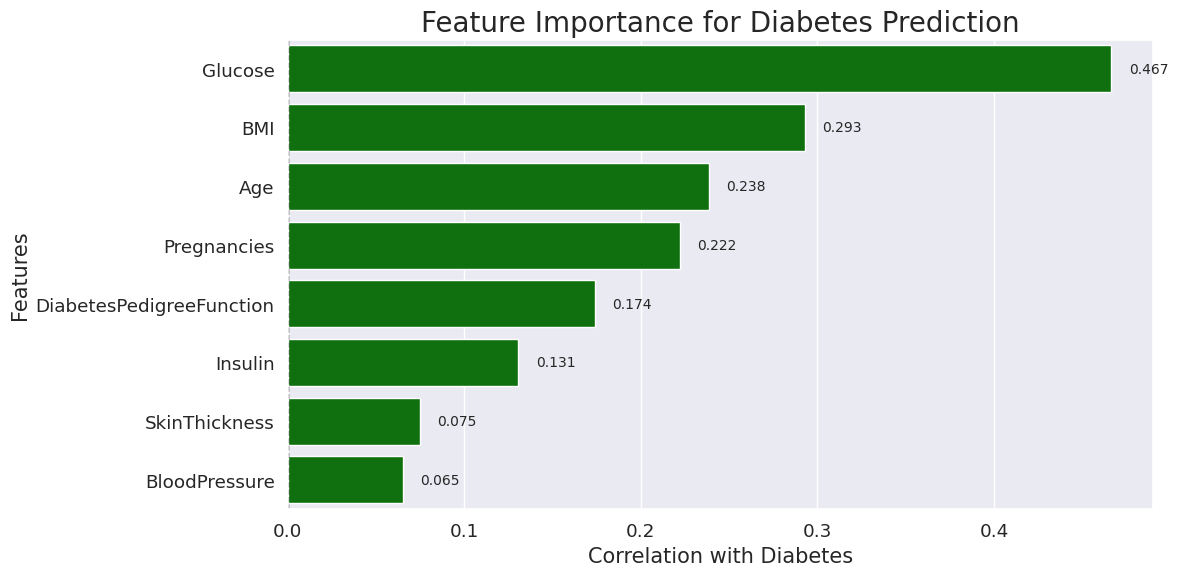

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
diabetes_data = pd.read_csv("diabetes.csv")

# Phân phối kết quả với labels đầy đủ
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=diabetes_data, x='Outcome', palette='Set2')
ax.set_xlabel('Diabetes Status', fontsize=12)
ax.set_ylabel('Number of Patients', fontsize=12)
ax.set_title('Distribution of Diabetes Patients', fontsize=20)
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

# Thêm giá trị trên mỗi cột
for container in ax.containers:
    ax.bar_label(container)

plt.show()

# So sánh các chỉ số giữa người có và không có bệnh
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
sns.set(font_scale=1.2)

# Biểu đồ 1: Glucose vs Outcome
ax1 = sns.boxplot(data=diabetes_data, x='Outcome', y='Glucose', ax=ax[0, 0], palette='Set2')
ax1.set_xlabel('Outcome')
ax1.set_ylabel('Glucose Level')
ax1.set_title('Glucose Level by Diabetes Status')
ax1.set_xticklabels(['No Diabetes', 'Diabetes'])

# Biểu đồ 2: BMI vs Outcome
ax2 = sns.boxplot(data=diabetes_data, x='Outcome', y='BMI', ax=ax[0, 1], palette='Set2')
ax2.set_xlabel('Outcome')
ax2.set_ylabel('BMI')
ax2.set_title('BMI by Diabetes Status')
ax2.set_xticklabels(['No Diabetes', 'Diabetes'])

# Biểu đồ 3: Age vs Outcome
ax3 = sns.boxplot(data=diabetes_data, x='Outcome', y='Age', ax=ax[1, 0], palette='Set2')
ax3.set_xlabel('Outcome')
ax3.set_ylabel('Age')
ax3.set_title('Age by Diabetes Status')
ax3.set_xticklabels(['No Diabetes', 'Diabetes'])

# Biểu đồ 4: Blood Pressure vs Outcome
ax4 = sns.boxplot(data=diabetes_data, x='Outcome', y='BloodPressure', ax=ax[1, 1], palette='Set2')
ax4.set_xlabel('Outcome')
ax4.set_ylabel('Blood Pressure')
ax4.set_title('Blood Pressure by Diabetes Status')
ax4.set_xticklabels(['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()

# Ma trận tương quan
plt.figure(figsize=(10, 8))
correlation = diabetes_data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            linewidths=1, square=True)
plt.title('Correlation Matrix of Diabetes Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Các thuộc tính ảnh hưởng nhất đến tiểu đường
plt.figure(figsize=(12, 6))
outcome_corr = diabetes_data.corr()['Outcome'].sort_values(ascending=False)[1:]
colors = ['green' if x > 0 else 'red' for x in outcome_corr.values]
ax = sns.barplot(x=outcome_corr.values, y=outcome_corr.index, palette=colors)
ax.set_xlabel('Correlation with Diabetes', fontsize=15)
ax.set_ylabel('Features', fontsize=15)
ax.set_title('Feature Importance for Diabetes Prediction', fontsize=20)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

# Thêm giá trị correlation
for i, v in enumerate(outcome_corr.values):
    ax.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

+ Thực hiện EDA trên tập dữ liệu mua sắm tại siêu thị. Tập dữ liệu lấy từ 
https://www.kaggle.com/code/rajatkumar30/eda-online-retail


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip

1. TỔNG QUAN DỮ LIỆU
Số lượng giao dịch: 541,909
Số lượng cột: 8

Các cột trong dữ liệu:
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Thông tin kiểu dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1

,Quantity,UnitPrice,TotalPrice
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,22.397000
std,179.331775,22.097877,309.071041
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,4.680000
50%,6.000000,1.950000,11.800000
75%,12.000000,3.750000,19.800000
max,80995.000000,8142.750000,168469.600000



Thống kê tổng quan:
Tổng số khách hàng: 4,338
Tổng số sản phẩm: 3,665
Tổng số hóa đơn: 18,532
Tổng số quốc gia: 37
Tổng doanh thu: £8,911,407.90

5. TRỰC QUAN HÓA


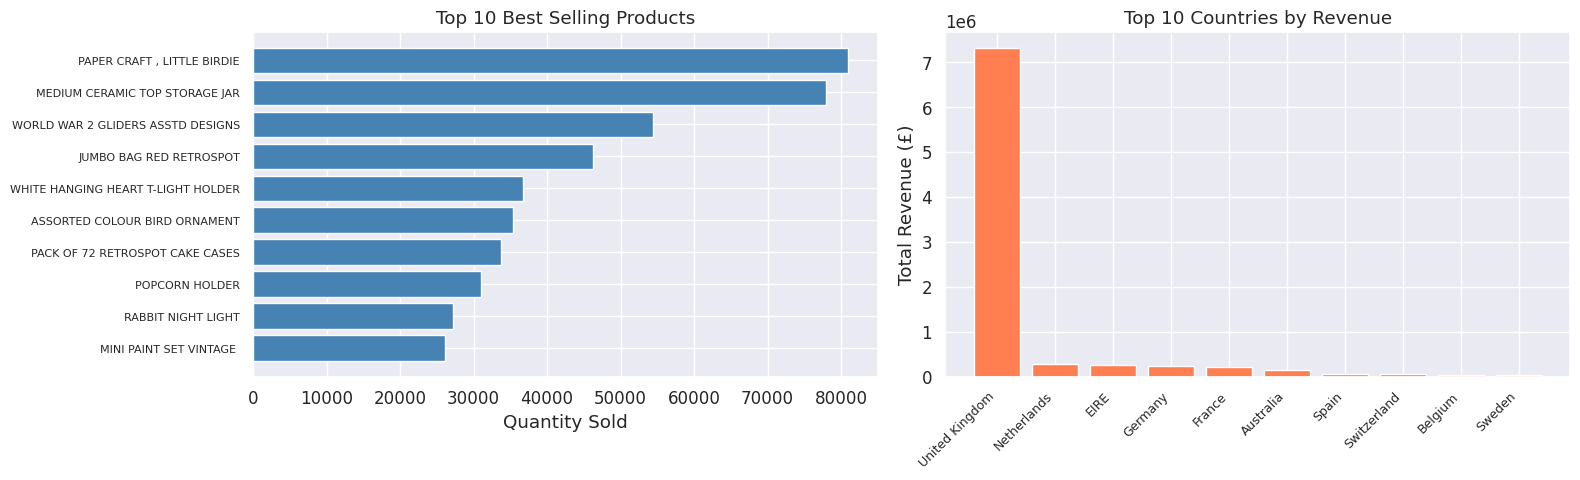

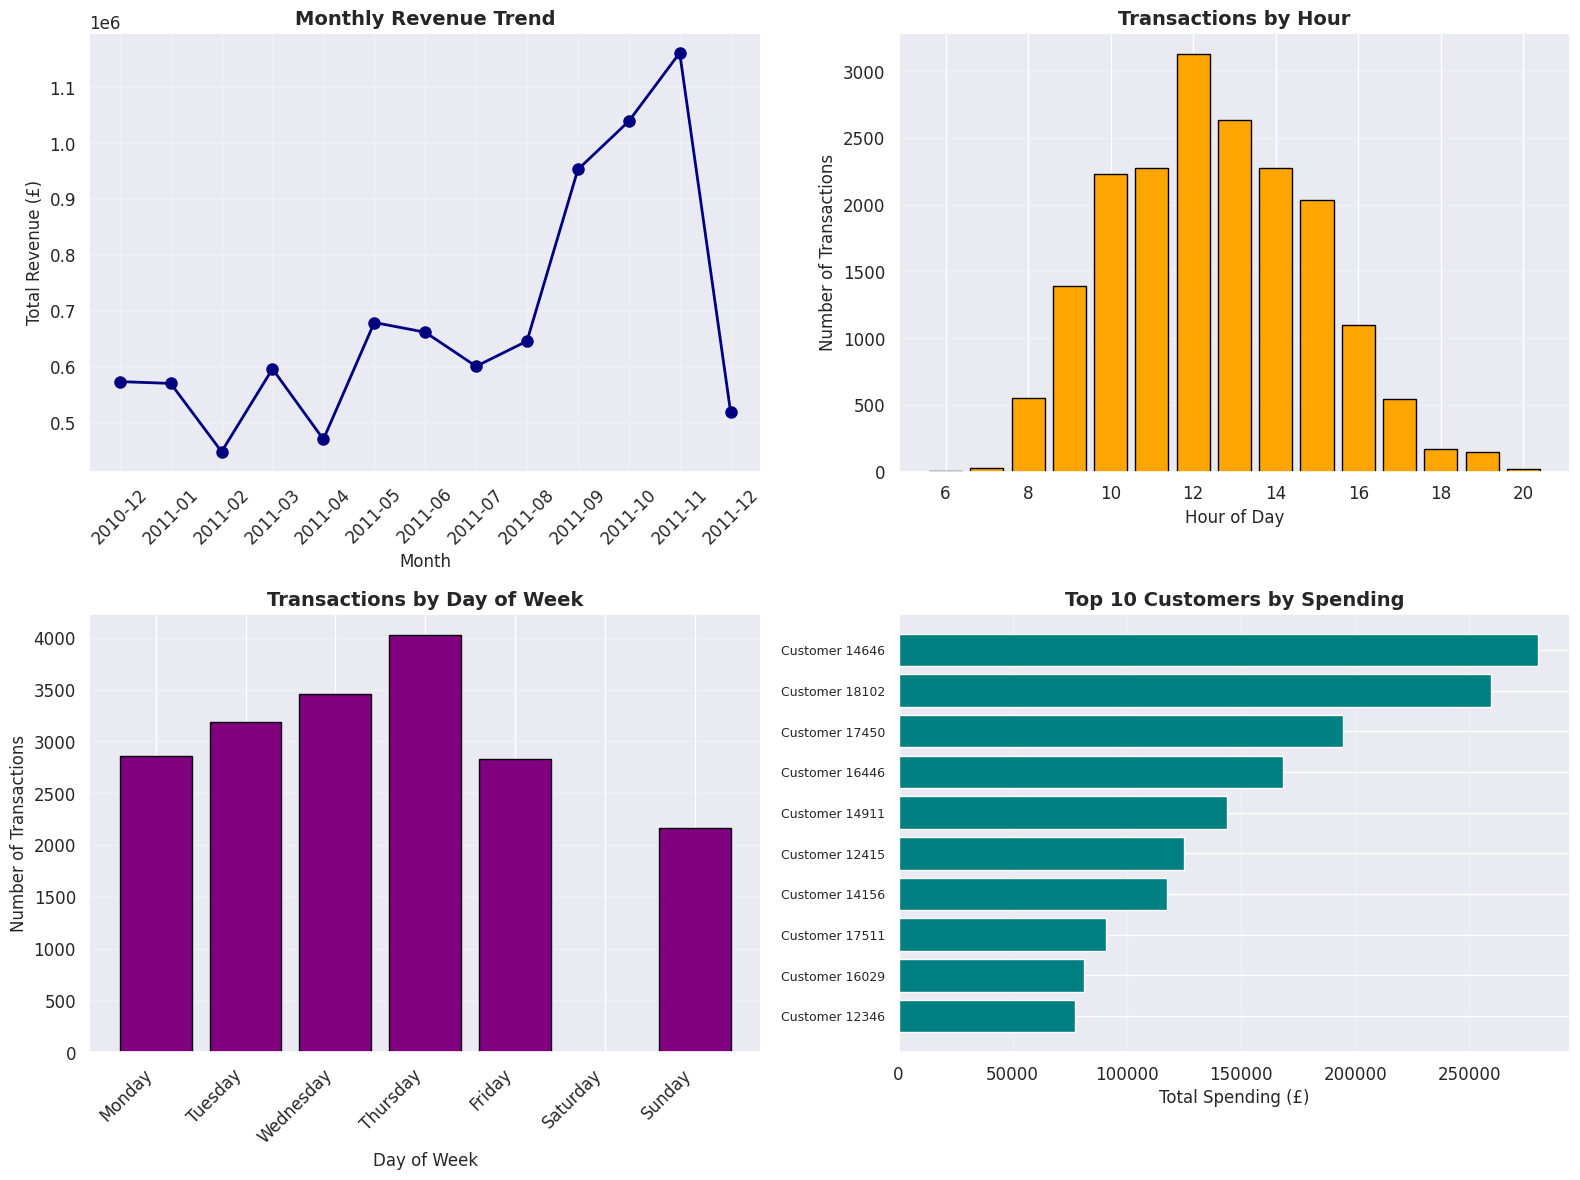

/tmp/ipykernel_2651/3739325816.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=retail_clean[retail_clean['Country'].isin(top5_countries)],


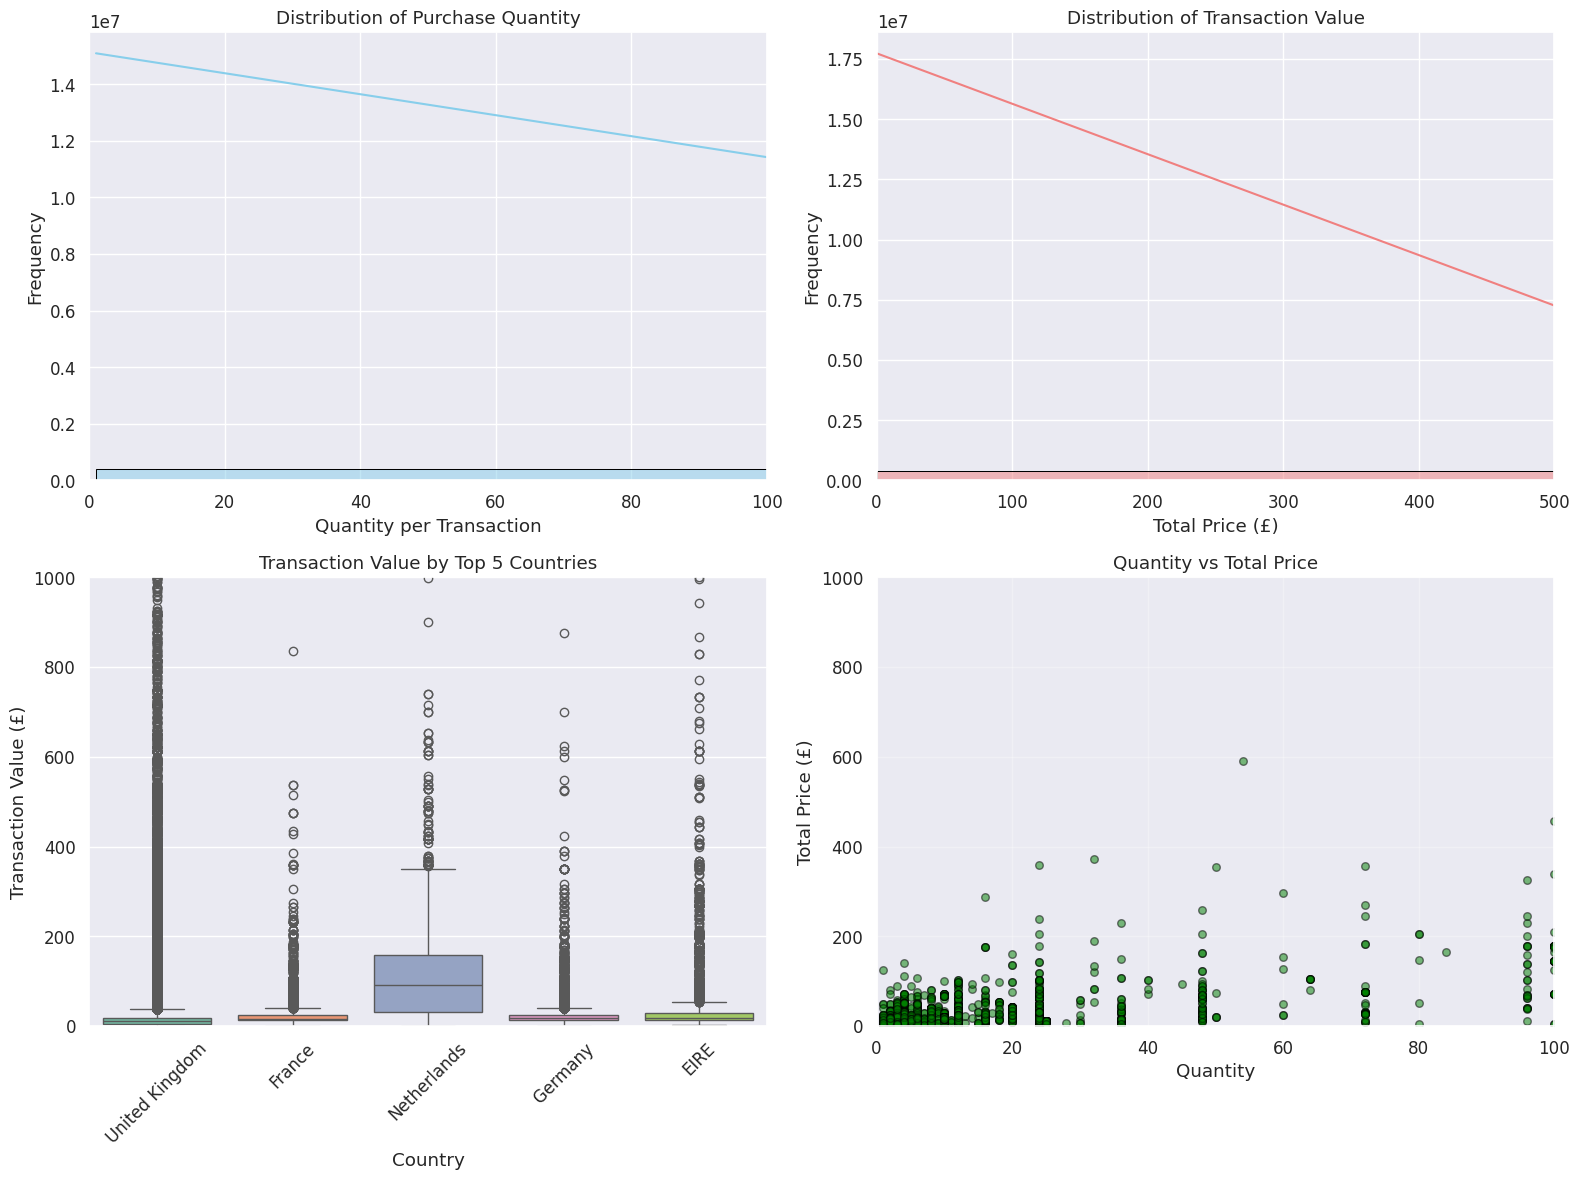

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
!pip install openpyxl

retail_data = pd.read_excel("Online Retail.xlsx")

print("\n1. TỔNG QUAN DỮ LIỆU")
print(f"Số lượng giao dịch: {retail_data.shape[0]:,}")
print(f"Số lượng cột: {retail_data.shape[1]}")
print("\nCác cột trong dữ liệu:")
print(retail_data.columns.tolist())
print("\nThông tin kiểu dữ liệu:")
print(retail_data.info())

print("\n2. KIỂM TRA DỮ LIỆU THIẾU")
missing_data = retail_data.isnull().sum()
missing_pct = (missing_data / len(retail_data)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_data, 
                           'Percentage': missing_pct})
print(missing_df[missing_df['Missing Count'] > 0])


print("\n3. XỬ LÝ DỮ LIỆU")
# Loại bỏ dòng có CustomerID null
retail_clean = retail_data.dropna(subset=['CustomerID'])
print(f"Sau khi loại bỏ null: {retail_clean.shape[0]:,} dòng")

# Loại bỏ giao dịch hủy (InvoiceNo bắt đầu bằng 'C')
retail_clean = retail_clean[~retail_clean['InvoiceNo'].astype(str).str.startswith('C')]
print(f"Sau khi loại bỏ giao dịch hủy: {retail_clean.shape[0]:,} dòng")

# Loại bỏ số lượng và giá âm
retail_clean = retail_clean[(retail_clean['Quantity'] > 0) & (retail_clean['UnitPrice'] > 0)]
print(f"Sau khi loại bỏ giá trị âm: {retail_clean.shape[0]:,} dòng")

# Tạo cột TotalPrice
retail_clean['TotalPrice'] = retail_clean['Quantity'] * retail_clean['UnitPrice']

# Chuyển đổi kiểu dữ liệu
retail_clean['InvoiceDate'] = pd.to_datetime(retail_clean['InvoiceDate'])
retail_clean['CustomerID'] = retail_clean['CustomerID'].astype(int)

print("\n4. THỐNG KÊ MÔ TẢ")
display(retail_clean[['Quantity', 'UnitPrice', 'TotalPrice']].describe())

print("\nThống kê tổng quan:")
print(f"Tổng số khách hàng: {retail_clean['CustomerID'].nunique():,}")
print(f"Tổng số sản phẩm: {retail_clean['StockCode'].nunique():,}")
print(f"Tổng số hóa đơn: {retail_clean['InvoiceNo'].nunique():,}")
print(f"Tổng số quốc gia: {retail_clean['Country'].nunique():,}")
print(f"Tổng doanh thu: £{retail_clean['TotalPrice'].sum():,.2f}")

print("\n5. TRỰC QUAN HÓA")

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
# Top 10 sản phẩm bán chạy
top_products = retail_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
axes[0].barh(range(len(top_products)), top_products.values, color='steelblue')
axes[0].set_yticks(range(len(top_products)))
axes[0].set_yticklabels(top_products.index, fontsize=8)
axes[0].set_xlabel('Quantity Sold')
axes[0].set_title('Top 10 Best Selling Products')
axes[0].invert_yaxis()

# Top 10 quốc gia theo doanh thu
top_countries = retail_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
axes[1].bar(range(len(top_countries)), top_countries.values, color='coral')
axes[1].set_xticks(range(len(top_countries)))
axes[1].set_xticklabels(top_countries.index, rotation=45, ha='right', fontsize=9)
axes[1].set_ylabel('Total Revenue (£)')
axes[1].set_title('Top 10 Countries by Revenue')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
# Doanh thu theo tháng
retail_clean['Month'] = retail_clean['InvoiceDate'].dt.to_period('M')
monthly_revenue = retail_clean.groupby('Month')['TotalPrice'].sum()
ax1 = axes[0, 0]
ax1.plot(monthly_revenue.index.astype(str), monthly_revenue.values, 
         marker='o', linewidth=2, markersize=8, color='navy')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Total Revenue (£)', fontsize=12)
ax1.set_title('Monthly Revenue Trend', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(alpha=0.3)

# Số lượng giao dịch theo giờ
retail_clean['Hour'] = retail_clean['InvoiceDate'].dt.hour
hourly_transactions = retail_clean.groupby('Hour')['InvoiceNo'].nunique()
ax2 = axes[0, 1]
ax2.bar(hourly_transactions.index, hourly_transactions.values, color='orange', edgecolor='black')
ax2.set_xlabel('Hour of Day', fontsize=12)
ax2.set_ylabel('Number of Transactions', fontsize=12)
ax2.set_title('Transactions by Hour', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Số lượng giao dịch theo ngày trong tuần
retail_clean['DayOfWeek'] = retail_clean['InvoiceDate'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_transactions = retail_clean.groupby('DayOfWeek')['InvoiceNo'].nunique().reindex(day_order)
ax3 = axes[1, 0]
ax3.bar(range(len(daily_transactions)), daily_transactions.values, color='purple', edgecolor='black')
ax3.set_xticks(range(len(daily_transactions)))
ax3.set_xticklabels(daily_transactions.index, rotation=45, ha='right')
ax3.set_xlabel('Day of Week', fontsize=12)
ax3.set_ylabel('Number of Transactions', fontsize=12)
ax3.set_title('Transactions by Day of Week', fontsize=14, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# Top 10 khách hàng
top_customers = retail_clean.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
ax4 = axes[1, 1]
ax4.barh(range(len(top_customers)), top_customers.values, color='teal')
ax4.set_yticks(range(len(top_customers)))
ax4.set_yticklabels([f'Customer {int(x)}' for x in top_customers.index], fontsize=9)
ax4.set_xlabel('Total Spending (£)', fontsize=12)
ax4.set_title('Top 10 Customers by Spending', fontsize=14, fontweight='bold')
ax4.invert_yaxis()
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.set(font_scale=1.1)
# Phân phối số lượng mua hàng
ax1 = axes[0, 0]
sns.histplot(data=retail_clean, x='Quantity', bins=50, kde=True, 
             color='skyblue', edgecolor='black', ax=ax1)
ax1.set_xlabel('Quantity per Transaction')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Purchase Quantity')
ax1.set_xlim(0, 100)

# Phân phối tổng giá
ax2 = axes[0, 1]
sns.histplot(data=retail_clean, x='TotalPrice', bins=50, kde=True,
             color='lightcoral', edgecolor='black', ax=ax2)
ax2.set_xlabel('Total Price (£)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Transaction Value')
ax2.set_xlim(0, 500)

# Boxplot giá theo quốc gia (Top 5)
top5_countries = retail_clean.groupby('Country')['TotalPrice'].sum().nlargest(5).index
ax3 = axes[1, 0]
sns.boxplot(data=retail_clean[retail_clean['Country'].isin(top5_countries)],
            x='Country', y='TotalPrice', palette='Set2', ax=ax3)
ax3.set_xlabel('Country')
ax3.set_ylabel('Transaction Value (£)')
ax3.set_title('Transaction Value by Top 5 Countries')
ax3.set_ylim(0, 1000)
ax3.tick_params(axis='x', rotation=45)

# Scatter plot: Quantity vs TotalPrice
ax4 = axes[1, 1]
sample_data = retail_clean.sample(min(5000, len(retail_clean)))
ax4.scatter(sample_data['Quantity'], sample_data['TotalPrice'], 
            alpha=0.5, c='green', edgecolors='black', s=30)
ax4.set_xlabel('Quantity')
ax4.set_ylabel('Total Price (£)')
ax4.set_title('Quantity vs Total Price')
ax4.set_xlim(0, 100)
ax4.set_ylim(0, 1000)
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()